# simple prediction

In [68]:
import pandas as p
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [69]:
olympia = p.read_csv("olympia.csv")

Let's pretend that the 2016 olympics didn't happen yet and remove them from the dataset. We will later predict its results

In [70]:
olympia_pre16 = olympia[olympia["year"] < 2016]

In [71]:
olympia_pre16.columns

Index(['country', 'iso3', 'year', 'medals', 'host', 'gdp_cap', 'pop', 'region',
       'continent', 'geographic area', 'exports', 'gdp growth rate',
       'gdp per capita', 'inflation rate', 'unemployment rate',
       'gross national saving', 'public debt', 'population growth rate',
       'life expectancy at birth', 'net migration rate', 'obesity',
       'education expenditures', 'health expenditures',
       'electricity consumption', 'oil imports', 'internet users',
       'military expenditures'],
      dtype='object')

Which fields do you think have an influence on the results? 

In [72]:
data_only_interesting_columns= olympia_pre16[["country", "medals", "pop", "gdp per capita"]]
data_only_interesting_columns[:3]

,country,medals,pop,gdp per capita
0,Afghanistan,1,26528741,1000.0
1,Afghanistan,1,29726803,1000.0
3,Albania,0,3168033,NaN


In [73]:
len(data_only_interesting_columns)

857

Need to do something about missing values. Let's see what happens if we drop them. 

In [74]:
data_only_interesting_columns = data_only_interesting_columns.dropna()

In [75]:
len(data_only_interesting_columns)

656

In [76]:
from sklearn.linear_model import LinearRegression
cls = LinearRegression()
X = data_only_interesting_columns[ data_only_interesting_columns.columns - ["country","medals"] ]
cls.fit(X, data_only_interesting_columns["medals"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
olympia2016 = olympia[olympia["year"] == 2016]

In [78]:
olympia2016["prediction"] = cls.predict( olympia2016[X.columns] )

In [79]:
olympia2016[["country", "medals", "prediction"]][:3]

,country,medals,prediction
2,Afghanistan,0,1.828295
8,Albania,0,3.265430
14,Algeria,2,3.948181


Doesn't look perfect. Let's see how wrong we were

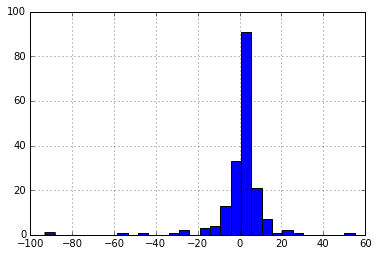

In [80]:
olympia2016["prediction_rounded"] = [int(c) for c in olympia2016["prediction"]]
olympia2016["error"] = olympia2016["prediction_rounded"] - olympia2016["medals"]
olympia2016["error"].hist(bins=30)

In [81]:
print("our model made a total of %i medal-mistakes" % sum(abs(olympia2016["error"])))

our model made a total of 1086 medal-mistakes


In [82]:
number_of_correct = len(olympia2016[olympia2016["error"] == 0])
number_of_correct / len(olympia2016)

0.11475409836065574

we predicted 10% correct, the rest was all wrong. Can you come up with a better prediction model? 

### Assignment

How high would be the percentage of correct predictions (=prediction accuracy), if you set all expected medals to 0. How does this compare to our linear model above? (is it better or worse? 